# Intern : Namit Jain

# DATA SCIENCE AND BUSINESS ANALYTICS Intern at The Sparks Foundation

## Task 2 : Prediction using Unsupervised Machine Learning

#### Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline

#### Reading the dataset from csv file

In [ ]:
df = pd.read_csv("Iris.csv")

#### Getting a view of the dataset

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Exploring the dimensions of dataset

In [ ]:
df.shape

(150, 6)

#### Checking the type of values of each column of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Obtaining general insight about data

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Only selecting suitable features from the data and deleting the rest

In [ ]:
df.drop(columns=['Id', 'Species'], inplace=True)

#### Generating the Elbow Method Plot to find the optimal number of clusters

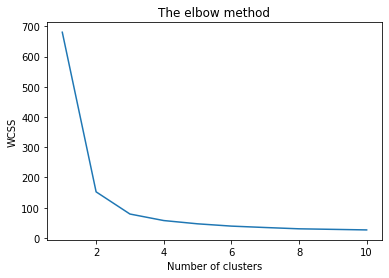

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=3)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From the Elbow method, the number of optimal clusters is <b>3</b>

#### Creating a KMeans classifier with number of clusters as 3

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=3)

#### Training the kmeans classifier with the dataset

In [ ]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

#### Predicting the clusters for data

In [ ]:
pred = kmeans.predict(df)

#### Checking the cluster values assigned to the data

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

#### Plotting the clusters using any 2 features from data

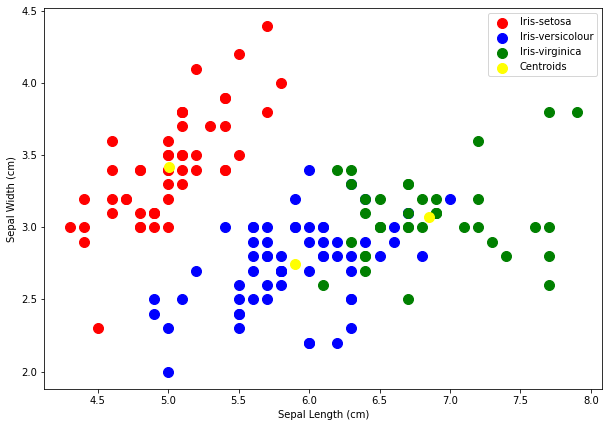

In [ ]:
plt.figure(figsize=(10, 7))

# Visualising the clusters - On the features Sepal Length and Sepal and Width 
plt.scatter(df['SepalLengthCm'][pred == 0], df['SepalWidthCm'][pred == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df['SepalLengthCm'][pred == 1], df['SepalWidthCm'][pred == 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df['SepalLengthCm'][pred == 2], df['SepalWidthCm'][pred == 2],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.legend(loc='upper right')
plt.show()

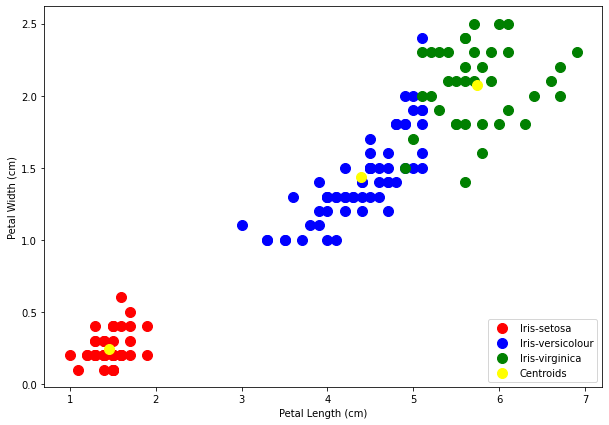

In [ ]:
plt.figure(figsize=(10, 7))

# Visualising the clusters - On the features Petal Length and Petal Width
plt.scatter(df['PetalLengthCm'][pred == 0], df['PetalWidthCm'][pred == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df['PetalLengthCm'][pred == 1], df['PetalWidthCm'][pred == 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df['PetalLengthCm'][pred == 2], df['PetalWidthCm'][pred == 2],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.legend(loc='lower right')
plt.show()

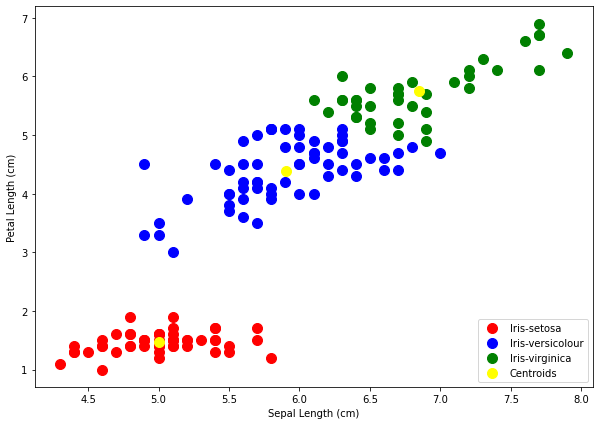

In [ ]:
plt.figure(figsize=(10, 7))

# Visualising the clusters - On the features Sepal Length and Petal Length
plt.scatter(df['SepalLengthCm'][pred == 0], df['PetalLengthCm'][pred == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df['SepalLengthCm'][pred == 1], df['PetalLengthCm'][pred == 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df['SepalLengthCm'][pred == 2], df['PetalLengthCm'][pred == 2],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")

plt.legend(loc='lower right')
plt.show()

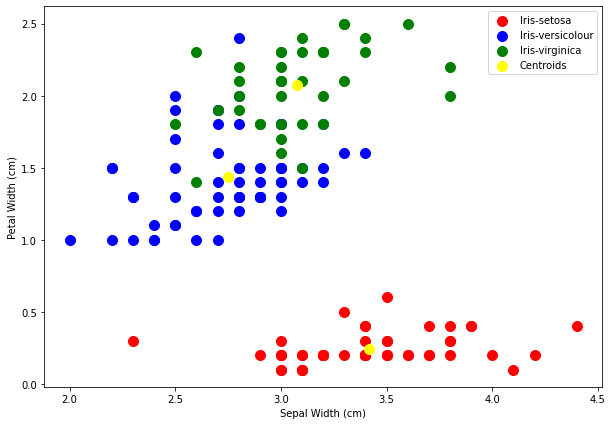

In [ ]:
plt.figure(figsize=(10, 7))

# Visualising the clusters - On the features Sepal Width and Petal Width
plt.scatter(df['SepalWidthCm'][pred == 0], df['PetalWidthCm'][pred == 0], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(df['SepalWidthCm'][pred == 1], df['PetalWidthCm'][pred == 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(df['SepalWidthCm'][pred == 2], df['PetalWidthCm'][pred == 2],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width (cm)")

plt.legend(loc='upper right')
plt.show()